In [52]:
import pandas as pd
# 에러가 아닌 경고메시지를 보지 않기 위한 설정
import warnings
warnings.filterwarnings('ignore')
# 화면표시생략(...) 처리 없이 보기위한 컬럼개수 설정
pd.options.display.max_columns=50

In [53]:
marathon_2015 = pd.read_csv('marathon_results_2015.csv')
marathon_2016 = pd.read_csv('marathon_results_2016.csv')
marathon_2017 = pd.read_csv('marathon_results_2017.csv')

marathon_2015['Year'] = '2015'
marathon_2016['Year'] = '2016'
marathon_2017['Year'] = '2017'

marathon_2015_2017 = pd.concat([marathon_2015,marathon_2016,marathon_2017],\
                              ignore_index=True)

In [54]:
import numpy as np
marathon_2015_2017['5K'] = pd.to_timedelta(marathon_2015_2017['5K'])
marathon_2015_2017['10K'] = pd.to_timedelta(marathon_2015_2017['10K'])
marathon_2015_2017['15K'] = pd.to_timedelta(marathon_2015_2017['15K'])
marathon_2015_2017['20K'] = pd.to_timedelta(marathon_2015_2017['20K'])
marathon_2015_2017['Half'] = pd.to_timedelta(marathon_2015_2017['Half'])
marathon_2015_2017['25K'] = pd.to_timedelta(marathon_2015_2017['25K'])
marathon_2015_2017['30K'] = pd.to_timedelta(marathon_2015_2017['30K'])
marathon_2015_2017['35K'] = pd.to_timedelta(marathon_2015_2017['35K'])
marathon_2015_2017['40K'] = pd.to_timedelta(marathon_2015_2017['40K'])
marathon_2015_2017['Pace'] = pd.to_timedelta(marathon_2015_2017['Pace'])
marathon_2015_2017['Official Time'] = pd.to_timedelta(marathon_2015_2017['Official Time'])

marathon_2015_2017['5K'] = marathon_2015_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['10K'] = marathon_2015_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['15K'] = marathon_2015_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['20K'] = marathon_2015_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['Half'] = marathon_2015_2017['Half'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['25K'] = marathon_2015_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['30K'] = marathon_2015_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['35K'] = marathon_2015_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['40K'] = marathon_2015_2017['40K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['Pace'] = marathon_2015_2017['Pace'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['Official Time'] = marathon_2015_2017['Official Time'].astype('m8[s]').astype(np.int64)
marathon_2015_2017.head(2)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,883,1783,2697,3629,3842,4567,5520,6479,7359,296,-,7757,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,883,1783,2698,3628,3841,4567,5519,6479,7362,298,-,7788,2,2,2,2015,NaN


In [55]:
# 불필요 컬럼 삭제
marathon_2015_2017 = marathon_2015_2017.drop(['Unnamed: 0','Bib','Citizen','Unnamed: 9',\
                                             'Proj Time','Unnamed: 8','Name','City','State'],\
                                            axis=1)
# 컬럼이름 변경
marathon_2015_2017.rename(columns={'Official Time':'final'}, inplace=True)
marathon_2015_2017.head(3)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,final,Overall,Gender,Division,Year
0,25,M,ETH,883,1783,2697,3629,3842,4567,5520,6479,7359,296,7757,1,1,1,2015
1,30,M,ETH,883,1783,2698,3628,3841,4567,5519,6479,7362,298,7788,2,2,2,2015
2,29,M,KEN,883,1783,2697,3629,3842,4567,5520,6479,7381,299,7822,3,3,3,2015


<AxesSubplot:xlabel='final', ylabel='Density'>

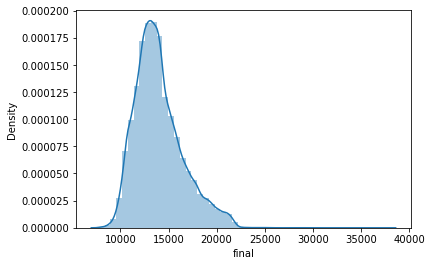

In [56]:
# 타겟값의 분포를 시각화 해봅니다
import seaborn as sns
sns.distplot(marathon_2015_2017['final'])

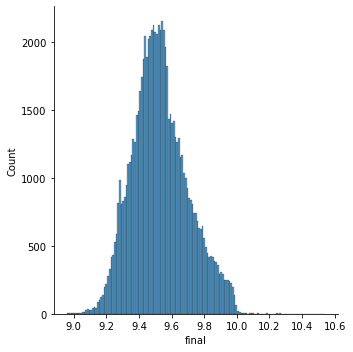

In [57]:
# 로그 변환을 통해 타겟 값의 분포도 조정
log_Final = np.log1p(marathon_2015_2017['final'])
sns.displot(log_Final)

In [58]:
# 타겟값을 로그변환하여 데이터에 적용

# 원본 기록 보관
original_Final = marathon_2015_2017['final']

marathon_2015_2017['final'] = np.log1p(marathon_2015_2017['final'])

In [59]:
null_column_count = marathon_2015_2017.isnull().sum()[\
                                                     marathon_2015_2017.isnull().sum()>0]
null_column_count

Series([], dtype: int64)

In [60]:
marathon_2015_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       79638 non-null  int64  
 1   M/F       79638 non-null  object 
 2   Country   79638 non-null  object 
 3   5K        79638 non-null  int64  
 4   10K       79638 non-null  int64  
 5   15K       79638 non-null  int64  
 6   20K       79638 non-null  int64  
 7   Half      79638 non-null  int64  
 8   25K       79638 non-null  int64  
 9   30K       79638 non-null  int64  
 10  35K       79638 non-null  int64  
 11  40K       79638 non-null  int64  
 12  Pace      79638 non-null  int64  
 13  final     79638 non-null  float64
 14  Overall   79638 non-null  int64  
 15  Gender    79638 non-null  int64  
 16  Division  79638 non-null  int64  
 17  Year      79638 non-null  object 
dtypes: float64(1), int64(14), object(3)
memory usage: 10.9+ MB


In [61]:
print('인코딩 전 shape', marathon_2015_2017.shape)
marathon_2015_2017_ohe = pd.get_dummies(marathon_2015_2017)
print('인코딩 후 shape', marathon_2015_2017_ohe.shape)

인코딩 전 shape (79638, 18)
인코딩 후 shape (79638, 125)


In [62]:
marathon_2015_2017_ohe.head(3)

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,final,Overall,Gender,Division,M/F_F,M/F_M,Country_AHO,Country_ALB,Country_ALG,Country_AND,Country_ARG,Country_AUS,Country_AUT,Country_BAH,...,Country_SIN,Country_SLO,Country_SMR,Country_SRB,Country_SUI,Country_SVK,Country_SWE,Country_TCA,Country_THA,Country_TPE,Country_TRI,Country_TUR,Country_TWN,Country_UAE,Country_UGA,Country_UKR,Country_URU,Country_USA,Country_VEN,Country_VGB,Country_VIE,Country_ZIM,Year_2015,Year_2016,Year_2017
0,25,883,1783,2697,3629,3842,4567,5520,6479,7359,296,8.956480,1,1,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,30,883,1783,2698,3628,3841,4567,5519,6479,7362,298,8.960468,2,2,2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,29,883,1783,2697,3629,3842,4567,5520,6479,7381,299,8.964823,3,3,3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
def get_rmses(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0}의 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse, 3)))
    return pred

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
# 데이터 분할
y_target = marathon_2015_2017_ohe['final']
X_feature = marathon_2015_2017_ohe.drop('final', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, \
                                                   test_size=0.2, random_state=156)

In [75]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
p = get_rmses(lr_reg)

LinearRegression의 RMSE : 0.013


In [79]:
np.exp(p).round()

array([13940., 13157., 10605., ..., 13056., 10517., 17478.])